In [1]:
import pandas as pd
import json
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
file1 = "../large_data/wine_data/cleaned_winedf2.csv"

In [3]:
df1 = pd.read_csv(file1)

In [4]:
df1.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,type,winery
0,Turkey,"Apricot blush in color, this wine has aromas o...",Seahorse Rosé,86,19,Aegean,NaN,NaN,Mike DeSimone,#NAME?,Pasaeli 2015 Seahorse Rosé Çalkarası (Aegean),Çalkarası,White,Pasaeli
1,Turkey,"Apricot blush in color, this wine has aromas o...",Seahorse Rosé,86,19,Aegean,NaN,NaN,NaN,NaN,NaN,Çalkarası,White,Pasaeli
2,Turkey,"Deep-salmon to the eye, this wine has a nose o...",Mermaid Rosé,87,19,Aegean,NaN,NaN,Mike DeSimone,#NAME?,Pasaeli 2015 Mermaid Rosé Çalkarası (Aegean),Çalkarası,White,Pasaeli
3,Turkey,"Deep-salmon to the eye, this wine has a nose o...",Mermaid Rosé,87,19,Aegean,NaN,NaN,NaN,NaN,NaN,Çalkarası,White,Pasaeli
4,Macedonia,This Macedonian white is bright yellow with gr...,NaN,86,13,Tikves,NaN,NaN,NaN,NaN,NaN,Žilavka,White,Stobi


In [5]:
df1 = df1.drop(columns=['designation', "taster_twitter_handle", "title", 'winery'])
df1 = df1.dropna(subset=['points', 'price'])
df1.head()

,country,description,points,price,province,region_1,region_2,taster_name,variety,type
0,Turkey,"Apricot blush in color, this wine has aromas o...",86,19,Aegean,NaN,NaN,Mike DeSimone,Çalkarası,White
1,Turkey,"Apricot blush in color, this wine has aromas o...",86,19,Aegean,NaN,NaN,NaN,Çalkarası,White
2,Turkey,"Deep-salmon to the eye, this wine has a nose o...",87,19,Aegean,NaN,NaN,Mike DeSimone,Çalkarası,White
3,Turkey,"Deep-salmon to the eye, this wine has a nose o...",87,19,Aegean,NaN,NaN,NaN,Çalkarası,White
4,Macedonia,This Macedonian white is bright yellow with gr...,86,13,Tikves,NaN,NaN,NaN,Žilavka,White


In [7]:
finalwinedf = df1
finalwinedf = finalwinedf.drop_duplicates(subset='description', keep='first')
file2 = "../large_data/wine_data/new_vs_old.csv"
df2 = pd.read_csv(file2)
finalwinedf = pd.merge(finalwinedf, df2, on="country")
finalwinedf

,country,description,points,price,province,region_1,region_2,taster_name,variety,type,old_vs_new,region,top_wine_regions
0,Turkey,"Apricot blush in color, this wine has aromas o...",86,19,Aegean,NaN,NaN,Mike DeSimone,Çalkarası,White,Old,Europe,others
1,Turkey,"Deep-salmon to the eye, this wine has a nose o...",87,19,Aegean,NaN,NaN,Mike DeSimone,Çalkarası,White,Old,Europe,others
2,Turkey,The bouquet of this wine offers aromas of blue...,88,21,Turkey,NaN,NaN,NaN,Boğazkere,Red,Old,Europe,others
3,Turkey,This wine is red-violet in colour and has a no...,89,21,Turkey,NaN,NaN,Mike DeSimone,Boğazkere,Red,Old,Europe,others
4,Turkey,"Aromas of raspberry, caramel and toast introdu...",89,33,Aegean,NaN,NaN,Mike DeSimone,Boğazkere,Red,Old,Europe,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156569,Lithuania,Heady floral and honey scents mingled with a f...,84,10,Lithuania,NaN,NaN,NaN,Sparkling Blend,White,Old,Europe,others
156570,Lithuania,"Apple, lemon, apricot and honey come together ...",84,10,Lithuania,NaN,NaN,NaN,Sparkling Blend,White,Old,Europe,others
156571,Lithuania,"Waves of citrus, apple and pear, balanced by a...",85,10,Lithuania,NaN,NaN,NaN,Sparkling Blend,White,Old,Europe,others
156572,US-France,"Defies categorization, in more ways than one. ...",88,50,Santa Barbara County-Condrieu,NaN,NaN,NaN,Viognier,White,New,North America,others


In [8]:
print("How many wines are rated?")
print(finalwinedf['points'].count())
print("How many wines are priced")
print(finalwinedf['price'].count())

How many wines are rated?
156574
How many wines are priced
156574


In [9]:
#Add country_id, taster_id, type_id
ml = finalwinedf[finalwinedf['price'].notna()]
ml = ml.assign(id=(ml['taster_name']).astype('category').cat.codes)
ml = ml.rename(columns={'id': 'taster_id'})
# ml = ml.loc[:, ['taster_id', 'country', 'description', 'points', 'price' ,'province', 'taster_name', 'variety', 'type', 'old_vs_new']]
ml.price = ml.price.astype(int)

ml = ml.assign(id=(ml['country']).astype('category').cat.codes)
ml = ml.rename(columns={'id': 'country_id'})
ml = ml.dropna(subset=['taster_name'])

ml = ml.assign(id=(ml['type']).astype('category').cat.codes)
ml = ml.rename(columns={'id': 'type_id'})


ml = ml.assign(id=(ml['old_vs_new']).astype('category').cat.codes)
ml = ml.rename(columns={'id': 'ovn'})
ml = ml.assign(id=(ml['region']).astype('category').cat.codes)
ml = ml.rename(columns={'id': 'region_id'})

#including "top regions" per https://winefolly.com/lifestyle/top-wine-regions-of-the-world/
ml = ml.assign(id=(ml['top_wine_regions']).astype('category').cat.codes)
ml = ml.rename(columns={'id': 'top_region'})

ml = ml.loc[:, ['country_id', 'country', 'description', 'points', 'price' ,'province', 'taster_name', 'taster_id', 'variety', 'type', 'type_id', 'old_vs_new', 'ovn', 'region', 'region_id', 'top_wine_regions', 'top_region']]

ml

,country_id,country,description,points,price,province,taster_name,taster_id,variety,type,type_id,old_vs_new,ovn,region,region_id,top_wine_regions,top_region
0,43,Turkey,"Apricot blush in color, this wine has aromas o...",86,19,Aegean,Mike DeSimone,13,Çalkarası,White,1,Old,1,Europe,2,others,16
1,43,Turkey,"Deep-salmon to the eye, this wine has a nose o...",87,19,Aegean,Mike DeSimone,13,Çalkarası,White,1,Old,1,Europe,2,others,16
3,43,Turkey,This wine is red-violet in colour and has a no...,89,21,Turkey,Mike DeSimone,13,Boğazkere,Red,0,Old,1,Europe,2,others,16
4,43,Turkey,"Aromas of raspberry, caramel and toast introdu...",89,33,Aegean,Mike DeSimone,13,Boğazkere,Red,0,Old,1,Europe,2,others,16
5,43,Turkey,"Dark ruby in the glass, this wine has a nose o...",90,19,Cappadocia,Mike DeSimone,13,Boğazkere,Red,0,Old,1,Europe,2,others,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156558,16,Georgia,"A blend of two indigenous Georgian grapes, thi...",89,14,Kakheti,Mike DeSimone,13,White Blend,White,1,Old,1,Europe,2,others,16
156559,16,Georgia,This amber-colored wine has a perfumed nose of...,90,17,Kakheti,Mike DeSimone,13,White Blend,White,1,Old,1,Europe,2,others,16
156561,2,Armenia,"Medium straw in the glass, this wine has a nos...",87,14,Armenia,Mike DeSimone,13,Kangoun,White,1,Old,1,Asia,1,others,16
156562,2,Armenia,"Deep salmon in color, this wine offers a bouqu...",88,15,Armenia,Mike DeSimone,13,Rosé,Red,0,Old,1,Asia,1,others,16


In [10]:
#Create the vins in which Data will be held
# bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
# bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]

#Create the names for the four bins
# group_names = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
group_names = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
# group_names = [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]

#Cut data into the assigned bins
ml["price_bin"] = pd.cut(ml["price"], bins, labels=group_names)

ml

,country_id,country,description,points,price,province,taster_name,taster_id,variety,type,type_id,old_vs_new,ovn,region,region_id,top_wine_regions,top_region,price_bin
0,43,Turkey,"Apricot blush in color, this wine has aromas o...",86,19,Aegean,Mike DeSimone,13,Çalkarası,White,1,Old,1,Europe,2,others,16,20
1,43,Turkey,"Deep-salmon to the eye, this wine has a nose o...",87,19,Aegean,Mike DeSimone,13,Çalkarası,White,1,Old,1,Europe,2,others,16,20
3,43,Turkey,This wine is red-violet in colour and has a no...,89,21,Turkey,Mike DeSimone,13,Boğazkere,Red,0,Old,1,Europe,2,others,16,30
4,43,Turkey,"Aromas of raspberry, caramel and toast introdu...",89,33,Aegean,Mike DeSimone,13,Boğazkere,Red,0,Old,1,Europe,2,others,16,40
5,43,Turkey,"Dark ruby in the glass, this wine has a nose o...",90,19,Cappadocia,Mike DeSimone,13,Boğazkere,Red,0,Old,1,Europe,2,others,16,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156558,16,Georgia,"A blend of two indigenous Georgian grapes, thi...",89,14,Kakheti,Mike DeSimone,13,White Blend,White,1,Old,1,Europe,2,others,16,20
156559,16,Georgia,This amber-colored wine has a perfumed nose of...,90,17,Kakheti,Mike DeSimone,13,White Blend,White,1,Old,1,Europe,2,others,16,20
156561,2,Armenia,"Medium straw in the glass, this wine has a nos...",87,14,Armenia,Mike DeSimone,13,Kangoun,White,1,Old,1,Asia,1,others,16,20
156562,2,Armenia,"Deep salmon in color, this wine offers a bouqu...",88,15,Armenia,Mike DeSimone,13,Rosé,Red,0,Old,1,Asia,1,others,16,20


In [11]:
ml_2 = ml.loc[:,['country_id', 'taster_id', 'type_id', 'points', 'price', 'price_bin', 'ovn', 'region_id', 'top_region']]

ml_2 = ml_2[(ml_2['price'] < 300) & (ml_2['points'] < 98)]

ml_3 = ml_2[(ml_2['price'] > 0) & (ml_2['price'] < 300)]

ml_2.points = ml_2.points.astype(int)
ml_2.price_bin = ml_2.price_bin.astype(int)


ml_3

,country_id,taster_id,type_id,points,price,price_bin,ovn,region_id,top_region
0,43,13,1,86,19,20,1,2,16
1,43,13,1,87,19,20,1,2,16
3,43,13,0,89,21,30,1,2,16
4,43,13,0,89,33,40,1,2,16
5,43,13,0,90,19,20,1,2,16
...,...,...,...,...,...,...,...,...,...
156558,16,13,1,89,14,20,1,2,16
156559,16,13,1,90,17,20,1,2,16
156561,2,13,1,87,14,20,1,1,16
156562,2,13,0,88,15,20,1,1,16


In [12]:
#Exploratory questions

print('ml = Total Dataset.')
print('ml_2 = Price <300 AND Points < 98')
print('Total Dataset: ')
print("How many countries are there?")
print(ml["country"].nunique())
print("How many provinces are there?")
print(ml['province'].nunique())
print("How many tasters are there?")
print(ml_2['taster_id'].nunique())
print("How many varieties are there?")
print(ml['variety'].nunique())
print(' ')
print("Pricing Analysis: ")
print("How many prices are there?")
print(ml_2['price'].count())
print("What is the average price per bottle of wine?")
print(ml_2['price'].mean())
print("What is the maximum price per bottle of wine?")
print(ml_2['price'].max())
print("What is the minimum price per bottle of wine?")
print(ml_2['price'].min())
print(' ')
print("Breakdown of price: ")
print(ml_2['price'].describe())
print(' ')

(ml['price'].sum())

ml = Total Dataset.
ml_2 = Price <300 AND Points < 98
Total Dataset: 
How many countries are there?
42
How many provinces are there?
417
How many tasters are there?
19
How many varieties are there?
653
 
Pricing Analysis: 
How many prices are there?
87868
What is the average price per bottle of wine?
33.536759684982016
What is the maximum price per bottle of wine?
299
What is the minimum price per bottle of wine?
4
 
Breakdown of price: 
count    87868.000000
mean        33.536760
std         27.235192
min          4.000000
25%         17.000000
50%         25.000000
75%         40.000000
max        299.000000
Name: price, dtype: float64
 


3114006

In [13]:
temp = ml.groupby(by="country").agg('count')
temp.reset_index()
temp.sort_values('country_id', ascending=False).head()

,country_id,description,points,price,province,taster_name,taster_id,variety,type,type_id,old_vs_new,ovn,region,region_id,top_wine_regions,top_region,price_bin
country,,,,,,,,,,,,,,,,,
US,34259,34259,34259,34259,34259,34259,34259,34259,34259,34259,34259,34259,34259,34259,34259,34259,34251
France,16035,16035,16035,16035,16035,16035,16035,16035,16035,16035,16035,16035,16035,16035,16035,16035,15864
Italy,9114,9114,9114,9114,9114,9114,9114,9114,9114,9114,9114,9114,9114,9114,9114,9114,9088
Spain,5984,5984,5984,5984,5984,5984,5984,5984,5984,5984,5984,5984,5984,5984,5984,5984,5972
Portugal,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4497,4482


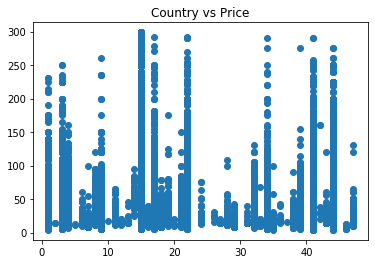

In [14]:
#country vs price
plt.scatter(ml_2['country_id'], ml_2['price'])
plt.title('Country vs Price')
plt.show()

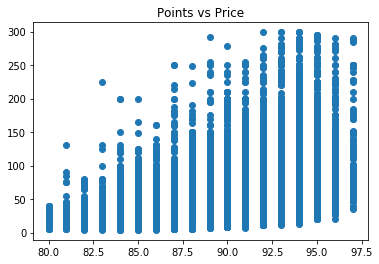

In [15]:
#points vs price
plt.scatter(ml_2['points'], ml_2['price'])
plt.title('Points vs Price')
plt.show()

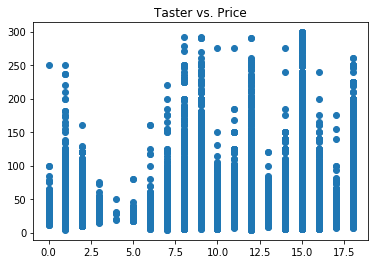

In [16]:
#Taster vs. Price
plt.scatter(ml_2['taster_id'], ml_2['price'])
plt.title('Taster vs. Price')
plt.show()

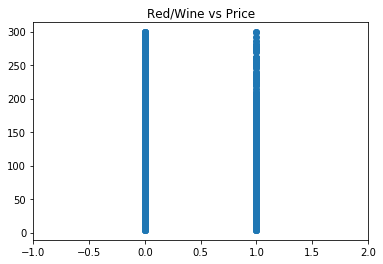

In [17]:
plt.scatter(ml_2['type_id'], ml_2['price'])
plt.title('Red/Wine vs Price')
plt.xlim(-1,2)
plt.show()

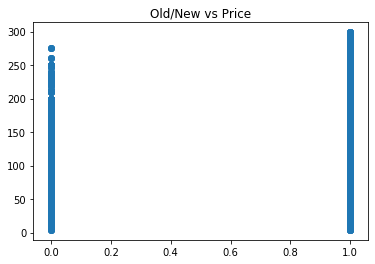

In [18]:
#Old vs New
plt.scatter(ml_2['ovn'], ml_2['price'])
plt.title("Old/New vs Price")
plt.show()

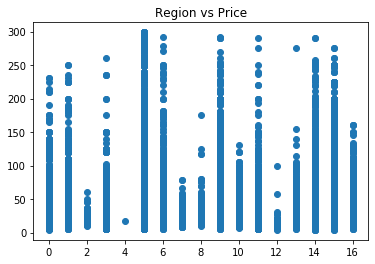

In [19]:
#Region vs Price
plt.scatter(ml_2['top_region'], ml_2['price'])
plt.title('Region vs Price')
plt.show()

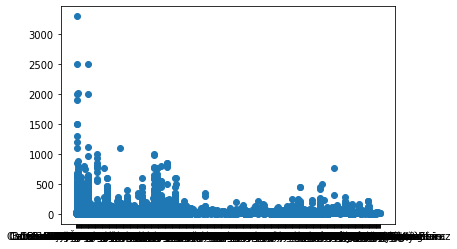

In [20]:
#vartiety with price
temp = ml[ml['variety'].notna()]
plt.scatter(temp['variety'], temp['price'])
plt.show()